# Model Evaluation for Fraud Detection

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [5]:
metrics = joblib.load('../data/processed/model_metrics.joblib')

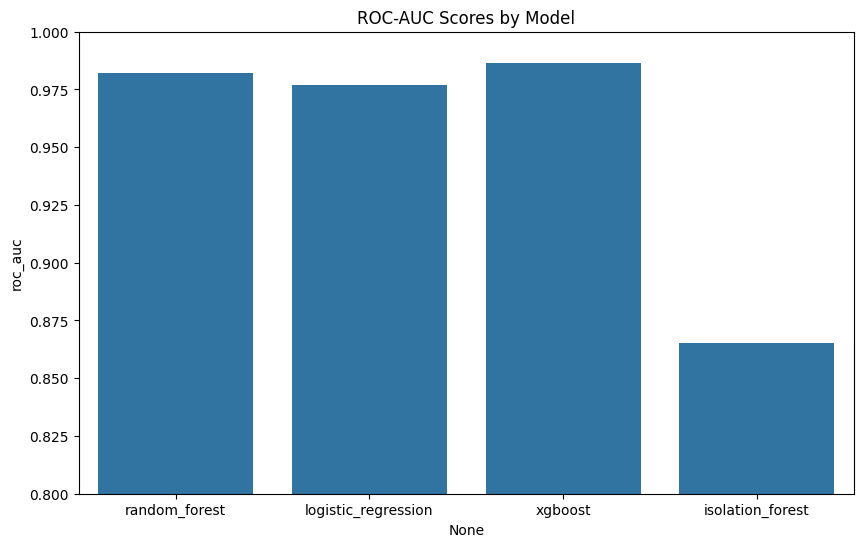

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=metrics.index, y=metrics['roc_auc'])
plt.title('ROC-AUC Scores by Model')
plt.ylim(0.8, 1.0)
plt.show()